In [19]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

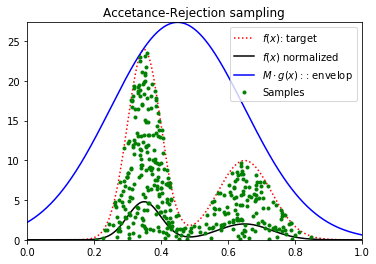

In [21]:
# Number of samples to draw from the probability estimation function
N = 1000

# The target probability density function f(x), maybe not normalized
# Two mixture of Normal that are normalized
# = lambda x: 0.6 * norm.pdf(x, 0.35, 0.05) + 0.4 * norm.pdf(x, 0.65, 0.08)
# Two mixture of Normal that are NOT normalized
target = lambda x: 3 * norm.pdf(x, 0.35, 0.05) + 2 * norm.pdf(x, 0.65, 0.08)
#target = lambda x: norm.pdf(x, np.log(4), 0.5)

# The target probability density function, normalized
targetPDF = lambda x: 0.6 * norm.pdf(x, 0.35, 0.05) + 0.4 * norm.pdf(x, 0.65, 0.08)

# The proposal probability density function g(x)
proposal = lambda x: norm.pdf(x, 0.45, 0.2)

# A number of samples, drawn from the approximated probability density function
x_samples = np.random.normal(0.45, 0.2, (N,)) #lambda_samples

# A number of samples in the interval [0, 1]
u = np.random.uniform(0, 1, (N, ))

# The multiplication constant to make M * g(x)>= f(x)
x = np.linspace(0,1,500) 
M = max(target(x) / proposal(x))

# Now examine all the samples and only use the samples found by rejection sampling
samples = [(x_samples[i], u[i] * M * proposal(x_samples[i])) for i in range(N) if u[i] < target(x_samples[i]) / (M * proposal(x_samples[i]))]

# Make the plots
fig, ax = plt.subplots(1, 1)

# The target function
ax.plot(x, target(x), 'r:', label='$f(x)$: target')

# The target probability density function
ax.plot(x, targetPDF(x), 'k-', label='$f(x)$ normalized')

# The approximated probability density function
ax.plot(x, M * proposal(x), 'b-', label='$M \cdot g(x):$: envelop')

# The samples found by rejection sampling
ax.plot([sample[0] for sample in samples], [sample[1] for sample in samples], 'g.', label='Samples')

# Set the window size
axes = plt.gca()
axes.set_xlim([0, 1])
axes.set_ylim([0, max(M*proposal(x))])

# Show the legend
plt.legend()

# Set the title
plt.title('Accetance-Rejection sampling')

# Show the plots
plt.show()

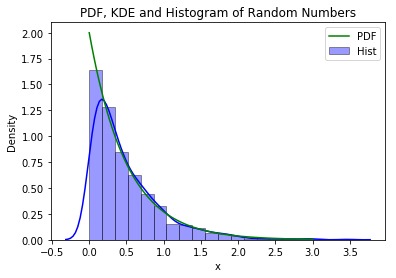

In [29]:

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# sample size
n = 1000
U = np.random.rand(n) #generate random numbers from standard uniform 

lambde = 2 # Note: lambda can NOT be used as a variable name because it is a keyword reserved by Python
X = -np.log(U)/lambde
sns.distplot(X, hist=True, kde=True, 
             bins=20, color = 'blue',
             hist_kws={'edgecolor':'black'},
             label='Hist')
# Add labels
plt.title('PDF, KDE and Histogram of Random Numbers')
plt.xlabel('x')
plt.ylabel('Density')


PDF_EXP = lambda x:  lambde*np.exp(-lambde*x)

xgrid = np.linspace(0, 3, 100)
ygrid = PDF_EXP(xgrid)
plt.plot(xgrid, ygrid, color='green', label='PDF')
plt.legend()
plt.show()